**IMPORT THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import plotly.offline as py
import plotly.graph_objects as go

**READ THE DATA**

In [ ]:
df = pd.read_csv("/content/drive/My Drive/CompleteDataset.csv", low_memory=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(17981, 75)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

#DATA PREPROCESSING

**Drop the column 'Unnamed: 0'**

In [ ]:
df = df.drop(df.columns[0], axis = 1)

**Function to remove characters 'K', 'M' and '€' from the data**

In [ ]:
def remove_char_from(value):
    out = value.replace('€','')
    if 'K' in out:
        out = float(out.replace('K',''))*1000
    elif 'M' in out:
        out = float(out.replace('M',''))*1000000
    return float(out)

**Remove the characters from wage and value columns and convert them to numeric column**

In [ ]:
df['Wage'] = [remove_char_from(x) for x in df.Wage]
df['Value'] = [remove_char_from(x) for x in df.Value]

In [ ]:
df.dtypes
df.head(10)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,230000.0,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,92000000.0,355000.0,2143,79,80,78,80,89,87,62,77,85,91,84,15,6,12,8,10,85,39,84,65,83,25,81,91,91,83,88,19,83,79,42,84,78,87,84.0,57.0,62.0,87.0,78.0,188545,84.0,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,ST,84.0,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,64500000.0,215000.0,1458,57,38,60,43,42,64,17,21,18,13,19,90,85,87,86,90,21,30,67,51,12,13,40,12,88,50,31,13,58,40,21,64,68,13,NaN,NaN,NaN,NaN,NaN,193080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,90500000.0,295000.0,2096,93,54,93,91,92,87,80,82,93,83,79,11,12,6,8,8,57,41,59,81,82,25,86,85,85,86,79,22,87,79,27,65,86,79,88.0,47.0,61.0,87.0,81.0,183277,88.0,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,LW,88.0,59.0,47.0,81.0,61.0,87.0,87.

In [ ]:
df['Preferred Positions'] = df['Preferred Positions'].str.split(' ',expand=False)

In [ ]:
df.apply(pd.to_numeric, errors='coerce')
def convert_to_float(x):
    if len(x.split('+')) > 1:
        return float(x.split('+')[0])
    if len(x.split('-')) > 1:
        return float(x.split('-')[0])
    else:
        return float(x)

a = [ 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']

for p in a:
    df[p] = list(map(convert_to_float, df[p]))

In [ ]:
mapping = {'ST': 'Attack', 'RW': 'Attack', 'LW': 'Attack', 'RM': 'Midfield', 'CM': 'Midfield', 'LM': 'Midfield', 'CAM': 'Midfield', 'CF': 'Midfield', 'CDM': 'Midfield', 'CB': 'Defence', 'LB': 'Defence', 'RB': 'Defence', 'RWB': 'Defence', 'LWB': 'Defence', 'GK': 'Goalkeeper'}

    
for index, row in df.iterrows():
    df.loc[index, 'FieldPosition'] = mapping[row['Preferred Positions'][0]]

In [ ]:
df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,FieldPosition
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,2228,89.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,94.0,76.0,7.0,11.0,15.0,14.0,11.0,88.0,29.0,95.0,77.0,92.0,22.0,85.0,95.0,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,"[ST, LW, ]",89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,Attack
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,2154,92.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,97.0,95.0,90.0,6.0,11.0,15.0,14.0,8.0,71.0,22.0,68.0,87.0,88.0,13.0,74.0,93.0,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,"[RW, ]",92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,Attack
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100,94.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,89.0,84.0,9.0,9.0,15.0,15.0,11.0,62.0,36.0,61.0,75.0,77.0,21.0,81.0,90.0,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,"[LW, ]",88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,Attack
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,2291,88.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,86.0,94.0,84.0,27.0,25.0,31.0,33.0,37.0,77.0,41.0,69.0,64.0,86.0,30.0,85.0,92.0,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,"[ST, ]",87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,Attack
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,230000.0,1493,58.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,30.0,13.0,11.0,91.0,90.0,95.0,91.0,89.0,25.0,30.0,78.0,59.0,16.0,10.0,47.0,12.0,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[GK, ]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Goalkeeper


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

# Load the example mpg dataset
mpg = df

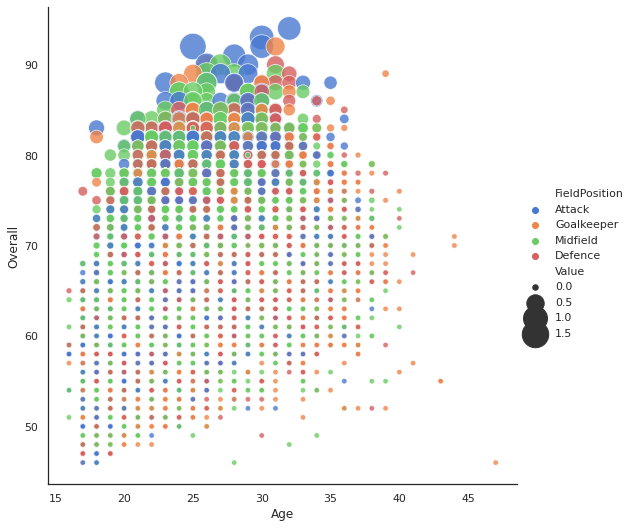

In [ ]:
p = sns.relplot(x="Age", y="Overall", hue="FieldPosition", size="Value",sizes=(30, 700), alpha=0.8, palette="muted",height=7.5, data=mpg)

In [ ]:
df_top10clubs = df[["Name", "Overall", "Club"]]
topclubs = df_top10clubs.groupby("Club", as_index= False).median().sort_values("Overall", ascending = False).head(10)
topclubs = list(topclubs["Club"])

df_top10clubs.groupby("Club", as_index= False).median().sort_values("Overall", ascending = False).head(10)

,Club,Overall
466,Real Madrid CF,83.0
330,Juventus,82.5
222,FC Bayern Munich,82.5
219,FC Barcelona,82.0
432,Paris Saint-Germain,81.0
51,Arsenal,80.0
377,Manchester United,80.0
67,Atlético Madrid,79.5
397,Napoli,79.0
529,Sevilla FC,79.0


OVERALL OF TOP 10 CLUBS

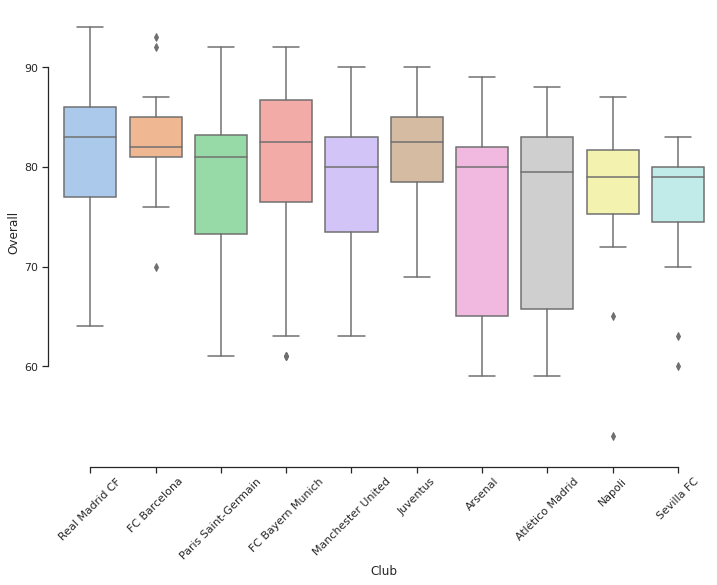

In [ ]:
clubs = topclubs
c = df.query('Club in @clubs')
sns.set(style="ticks", palette="pastel")
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

box_wage = sns.boxplot(data = c, y = 'Overall', x = 'Club')
sns.despine(offset=10, trim=True)
a = plt.setp(ax.get_xticklabels(), rotation=45)

POTENTIAL OF TOP 10 CLUBS

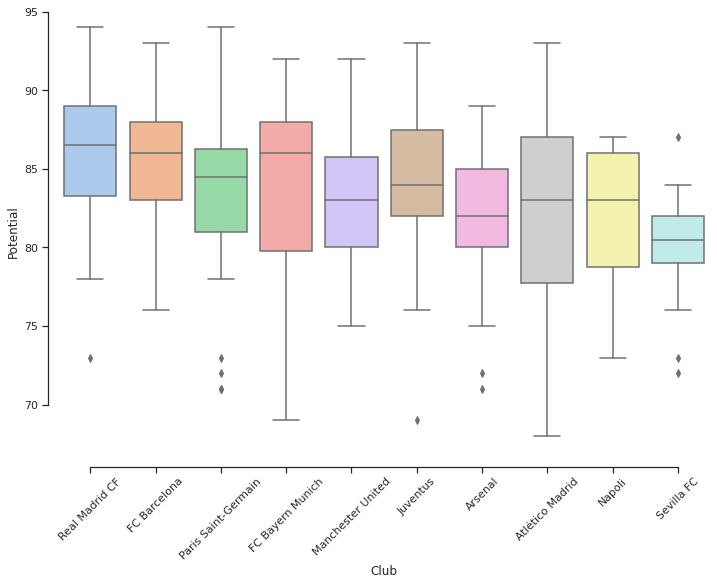

In [ ]:
clubs = topclubs
c = df.query('Club in @clubs')

sns.set(style="ticks", palette="pastel")
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

box_wage = sns.boxplot(data = c, y = 'Potential', x = 'Club')
sns.despine(offset=10, trim=True)
a = plt.setp(ax.get_xticklabels(), rotation=45)

In [ ]:

def overall_potential():
    overall = pd.DataFrame(df.groupby(["Age"])['Overall'].mean())
    potential = pd.DataFrame(df.groupby(["Age"])['Potential'].mean())
    merged = pd.merge(overall, potential, on='Age', how='inner')
    merged['Age']= merged.index
    fig, ax = plt.subplots(figsize=(11, 8))
    merged.reset_index(drop = True, inplace = True)
    p = plt.plot('Age', 'Overall', data=merged, marker='.', color='skyblue', linewidth=1, label ="Overall" )
    p = plt.plot('Age', 'Potential', data=merged, marker='.', color='green', linewidth=1, label = "Potential")
    p = plt.legend()

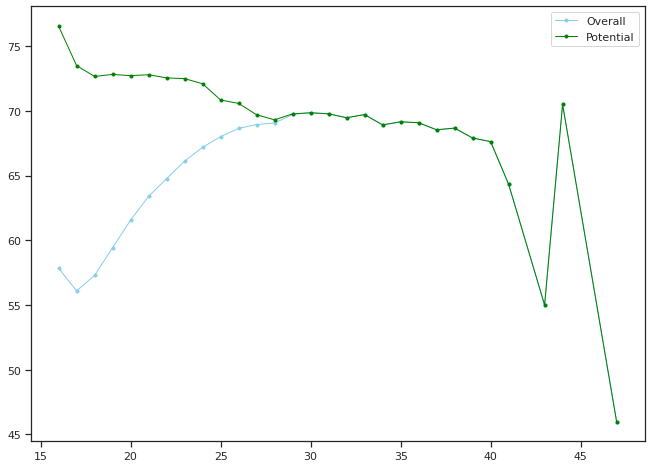

In [ ]:
overall_potential()

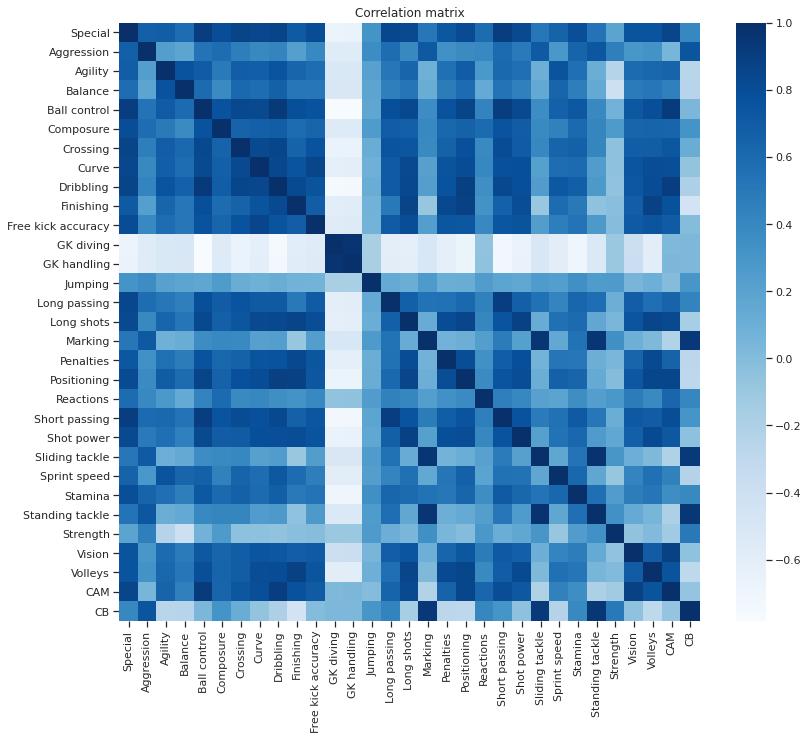

In [ ]:
L = [11]+list(range(13,25))+list(range(30,48))
d = df.iloc[ :, L]
fig, ax = plt.subplots()
fig.set_size_inches(13,11)
ax = sns.heatmap(d.corr(),cmap = "Blues").set_title('Correlation matrix')

Player value according to Preferred Position

In [ ]:
def in_preferred_position(list_pos, pos):
    if pos in list_pos:
        return True
    return False

In [ ]:
CAM = df[[in_preferred_position(x, 'CAM') for x in df['Preferred Positions']]].sort_values('CAM', ascending=False)[:100]
CAM["PPos"] = "Central Attacking Midfielder"

CB = df[[in_preferred_position(x, 'CB') for x in df['Preferred Positions']]].sort_values(by="CB",ascending=False)[:100]
CB["PPos"] = "Center Back"

CDM = df[[in_preferred_position(x, 'CDM') for x in df['Preferred Positions']]].sort_values(by="CDM",ascending=False)[:100]
CDM["PPos"] = "Central Defensive Midfielder"

CF = df[[in_preferred_position(x, 'CF') for x in df['Preferred Positions']]].sort_values(by="CF",ascending=False)[:100]
CF["PPos"] = "Center Forward"

CM = df[[in_preferred_position(x, 'CM') for x in df['Preferred Positions']]].sort_values(by="CM",ascending=False)[:100]
CM["PPos"] = "Central Midfielder"

LB = df[[in_preferred_position(x, 'LB') for x in df['Preferred Positions']]].sort_values(by="LB",ascending=False)[:100]
LB["PPos"] = "Left Back"

LM = df[[in_preferred_position(x, 'LM') for x in df['Preferred Positions']]].sort_values(by="LM",ascending=False)[:100]
LM["PPos"] = "Left Midfielder"

LW = df[[in_preferred_position(x, 'LW') for x in df['Preferred Positions']]].sort_values(by="LW",ascending=False)[:100]
LW["PPos"] = "Left Wing"

LWB = df[[in_preferred_position(x, 'LWB') for x in df['Preferred Positions']]].sort_values(by="LWB",ascending=False)[:100]
LWB["PPos"] = "Left Wing Back"

RB = df[[in_preferred_position(x, 'RB') for x in df['Preferred Positions']]].sort_values(by="RB",ascending=False)[:100]
RB["PPos"] = "Right Back"

RM = df[[in_preferred_position(x, 'RM') for x in df['Preferred Positions']]].sort_values(by="RM",ascending=False)[:100]
RM["PPos"] = "Right Midfielder"

RW = df[[in_preferred_position(x, 'RW') for x in df['Preferred Positions']]].sort_values(by="RW",ascending=False)[:100]
RW["PPos"] = "Right Wing"

RWB = df[[in_preferred_position(x, 'RWB') for x in df['Preferred Positions']]].sort_values(by="RWB",ascending=False)[:100]
RWB["PPos"] = "Right Wing Back"

ST = df[[in_preferred_position(x, 'ST') for x in df['Preferred Positions']]].sort_values(by="ST",ascending=False)[:100]
ST["PPos"] = "Striker"

GK = df[[in_preferred_position(x, 'GK') for x in df['Preferred Positions']]].sort_values(by="Overall",ascending=False)[:100]
GK["PPos"] = "Goal Keeper"

trace1 = go.Box(
    y = LW["Value"],
    name = "Left Wing Forward",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,204,102)'),
    line = dict(
        color = 'rgb(0,204,102)')
)

trace2 = go.Box(
    y = LM["Value"],
    name = "Left Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,204,204)'),
    line = dict(
        color = 'rgb(0,204,204)')
)  

trace3 = go.Box(
    y = LWB["Value"],
    name = "Left Wing Back",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,153,153)'),
    line = dict(
        color = 'rgb(0,153,153)')
)

trace4 = go.Box(
    y = LB["Value"],
    name = "Left Back",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,102,102)'),
    line = dict(
        color = 'rgb(0,102,102)')
)      

trace5 = go.Box(
    y = CF["Value"],
    name = "Center Forward",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(102,102,255)'),
    line = dict(
        color = 'rgb(102,102,255)')
)

trace6 = go.Box(
    y = CAM["Value"],
    name = "Central Attacking Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(51,51,255)'),
    line = dict(
        color = 'rgb(51,51,255)')
)  

trace7 = go.Box(
    y = CM["Value"],
    name = "Central Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,0,204)'),
    line = dict(
        color = 'rgb(0,0,204)')
)

trace8 = go.Box(
    y = CDM["Value"],
    name = "Central Defensive Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,0,153)'),
    line = dict(
        color = 'rgb(0,0,153)')
)
    
trace9 = go.Box(
    y = CB["Value"],
    name = "Center Back",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,0,153)'),
    line = dict(
        color = 'rgb(0,0,153)')
)    

trace10 = go.Box(
    y = RW["Value"],
    name = "Right Wing Forward",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,128,255)'),
    line = dict(
        color = 'rgb(0,128,255)')
)  

trace11 = go.Box(
    y = RM["Value"],
    name = "Right Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,102,204)'),
    line = dict(
        color = 'rgb(0,102,204)')
)

trace12 = go.Box(
    y = RWB["Value"],
    name = "Right Wing Back",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,76,153)'),
    line = dict(
        color = 'rgb(0,76,153)')
)
    
trace13 = go.Box(
    y = RB["Value"],
    name = "Right Back",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,51,102)'),
    line = dict(
        color = 'rgb(0,51,102)')
)      

trace14 = go.Box(
    y = ST["Value"],
    name = "Striker",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,102,53)'),
    line = dict(
        color = 'rgb(0,102,53)')
)
    
trace15 = go.Box(
    y = GK["Value"],
    name = "Goal Keeper",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(102,0,102)'),
    line = dict(
        color = 'rgb(102,0,102)')
)    
data_plot = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14,trace15]

layout = go.Layout(
    title = "Player Value at Different Positions"
)

fig = go.Figure(data=data_plot,layout=layout)


In [ ]:
py.iplot(fig, filename = "Value vs Position.html")

Player value according to Field Position


In [ ]:
Att = df[df['FieldPosition'] == 'Attack'].sort_values('Overall', ascending=False)[:100]
Mid = df[df['FieldPosition'] == 'Midfield'].sort_values('Overall', ascending=False)[:100]
Def = df[df['FieldPosition'] == 'Defence'].sort_values('Overall', ascending=False)[:100]
Gk = df[df['FieldPosition'] == 'Goalkeeper'].sort_values('Overall', ascending=False)[:100]

In [ ]:
trace1 = go.Box(
    y = Att["Value"],
    name = "Attack",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,204,102)'),
    line = dict(
        color = 'rgb(0,204,102)')
)

trace2 = go.Box(
    y = Mid["Value"],
    name = "Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,204,204)'),
    line = dict(
        color = 'rgb(0,204,204)')
)  

trace3 = go.Box(
    y = Def["Value"],
    name = "Defence",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,153,153)'),
    line = dict(
        color = 'rgb(0,153,153)')
)
trace4 = go.Box(
    y = Gk["Value"],
    name = "Goalkeeper",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(102,0,102)'),
    line = dict(
        color = 'rgb(102,0,102)')
)

data_plot = [trace1,trace2,trace3,trace4]

layout = go.Layout(
    title = "Player Value at Different Positions"
)

fig = go.Figure(data=data_plot,layout=layout)

In [ ]:
py.iplot(fig, filename = "Value over Position.html")

In [ ]:
def dreamTeam(formation, data, club='', country=''):
    df_copy = df.copy()
    squad = []
    if country:
        df_copy = df_copy[df_copy['Nationality'] == country.title()]
    if club:
        df_copy = df_copy[df_copy['Club'] == club.title()]
    for position in formation:
        if (position == 'GK'):
            g = df_copy[[in_preferred_position(x, position) for x in df_copy['Preferred Positions']]]
            g = g.sort_values('Overall', ascending=False)
            player = g.iloc[0][['ID', 'Name', 'Nationality', 'Overall', 'Preferred Positions']]
            position_rating = player['Overall']
        else:
            ng = df_copy[[in_preferred_position(x, position) for x in df_copy['Preferred Positions']]]
            if ng.empty:
                ng = df_copy
            ng = ng.sort_values(str(position), ascending=False)
            player = ng.iloc[0]
            position_rating = player[position]
            player = player[['ID', 'Name', 'Nationality', 'Overall', 'Preferred Positions']]   
        player['Position'] = str(position)
        player['Position Rating'] = position_rating
        squad.append(player)
        df_copy = df_copy[df_copy['ID'] != player['ID']]
    squad = pd.DataFrame(np.array(squad).reshape(11,7), columns = ['ID','Name', 'Nationality', 'OVR', 'Preferred Positions', 'Position', 'Rating'])
    return squad

In [ ]:
team_433 = ['GK', 'LWB', 'LCB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']
s = dreamTeam(team_433, df, country='', club='')
s[['Name', 'Rating', 'Position', 'Nationality']]

,Name,Rating,Position,Nationality
0,M. Neuer,92,GK,Germany
1,D. Rose,81,LWB,England
2,Sergio Ramos,87,LCB,Spain
3,G. Chiellini,86,CB,Italy
4,Azpilicueta,84,RB,Spain
5,A. Sánchez,85,LM,Chile
6,A. Vidal,85,CDM,Chile
7,K. De Bruyne,85,RM,Belgium
8,Cristiano Ronaldo,91,LW,Portugal
9,L. Suárez,88,ST,Uruguay
